# Import

In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

from keras.layers import LeakyReLU
from keras.models import load_model

from IAdeforestation.tools import *

# Path definition

In [29]:
SAVED_MODELS_PATH = os.path.join('saved_models')
TENSORFLOW_HUB_PATH = os.path.join('tensowflow_hub')
TRANSFER_LEARNING_PATH = os.path.join('transfer_learning')

# Coffee - Startified dataset

In [33]:
paths = {
    'ResNet 64x64':os.path.join(SAVED_MODELS_PATH, TENSORFLOW_HUB_PATH, 'Coffee','strat_coffee_2', 'strat_coffee_2.json'),
    'ResNet 32x32':os.path.join(SAVED_MODELS_PATH, TENSORFLOW_HUB_PATH, 'Coffee','strat_coffee_32_1', 'strat_coffee_32_1.json'),
    'DenseNet 64x64':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','start_coffee_2', 'start_coffee_2.json'),
    'DenseNet 32x32':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','strat_coffee_32_1', 'strat_coffee_32_1.json'),
    'DenseNet 64x64 \nVietnam params':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','start_coffee_vietnam_2', 'start_coffee_vietnam_2.json'),
    'DenseNet 32x32 \nVietnam params':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','start_coffee_vietnam_32_1', 'start_coffee_vietnam_32_1.json'),
    'DenseNet 64x64 \n300 epochs\nFocal loss':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','start_coffee_300E_focal', 'start_coffee_300E_focal.json'),
}

## Boxplots

In [34]:
epochs_accs = []
epochs_f1 = []
epochs_loss = []

for name, path in paths.items():
    with open(path) as json_file:
        data = json.load(json_file)
        
        epochs_accs.append(list(zip(*data))[1])
        epochs_f1.append(list(zip(*data))[4])
        epochs_loss.append(list(zip(*data))[0])


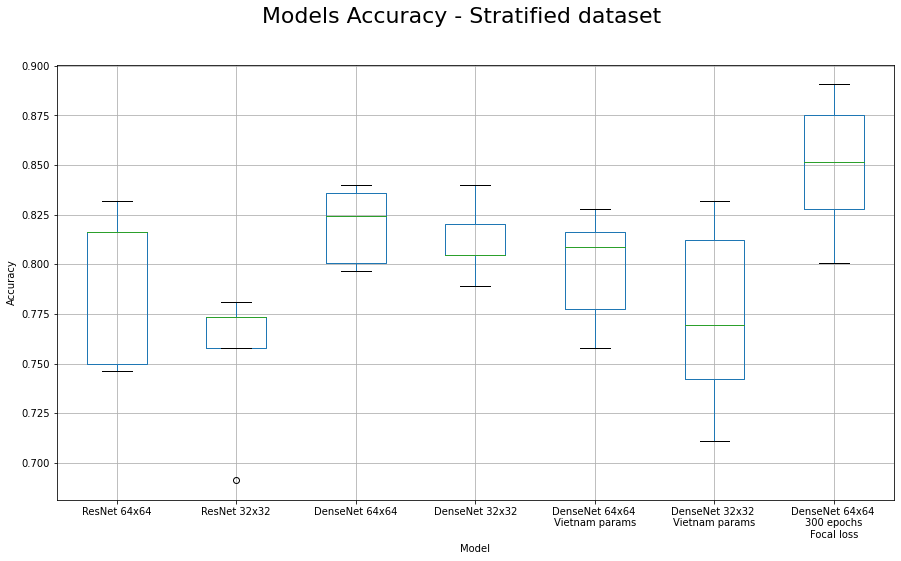

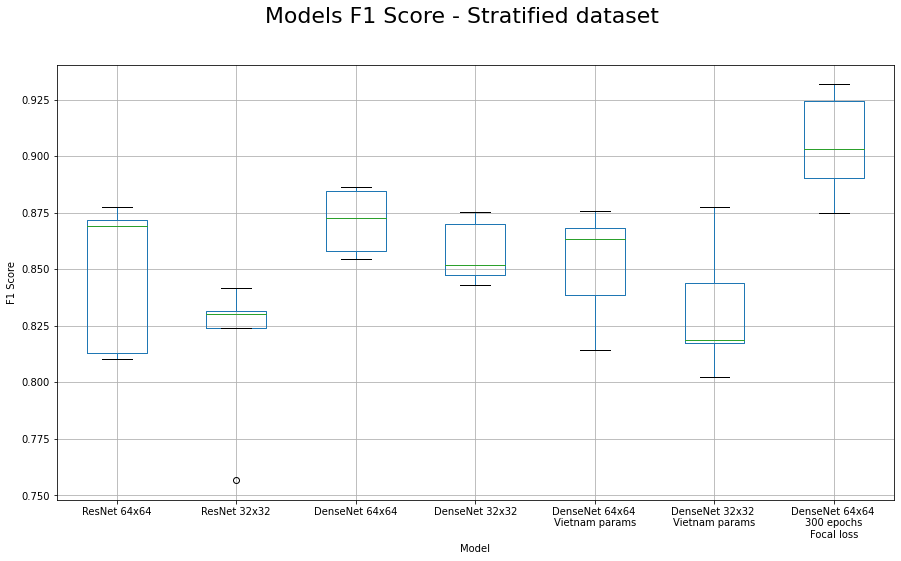

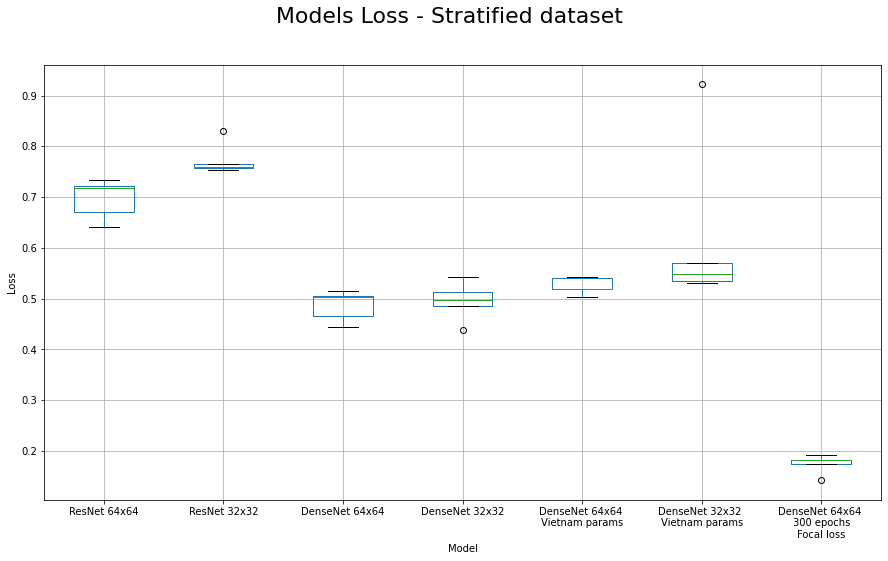

In [38]:
dict_metrics = {'Accuracy':epochs_accs, 'F1 Score':epochs_f1, 'Loss':epochs_loss}

for metric, values in dict_metrics.items():
    df_metric = pd.DataFrame(values).T
    df_metric.columns = list(paths.keys())

    fig, ax = plt.subplots(figsize=(15,8))
    fig.suptitle(f"Models {metric} - Stratified dataset", fontsize=22)
    
    ax.set_xlabel("Model")
    ax.set_ylabel(metric)

    
    df_metric.boxplot(ax=ax)

## Histogramme

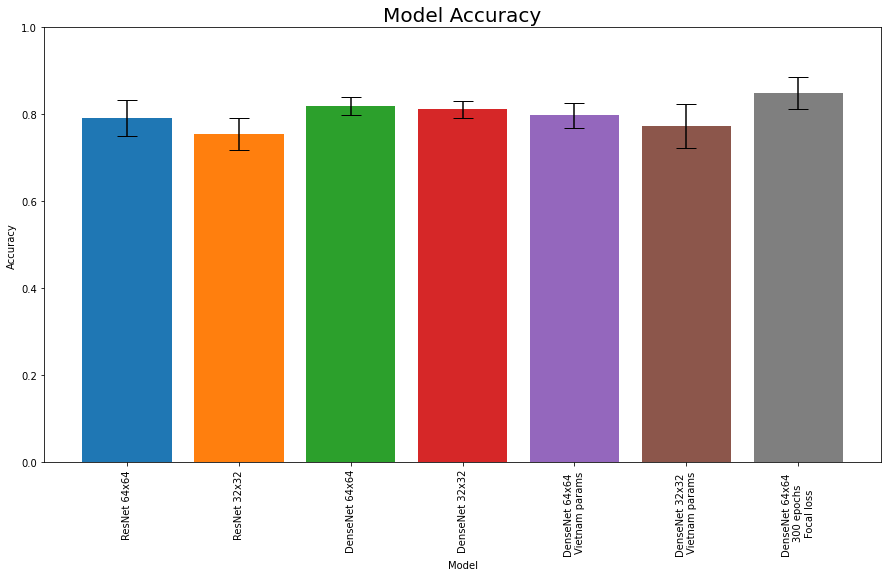

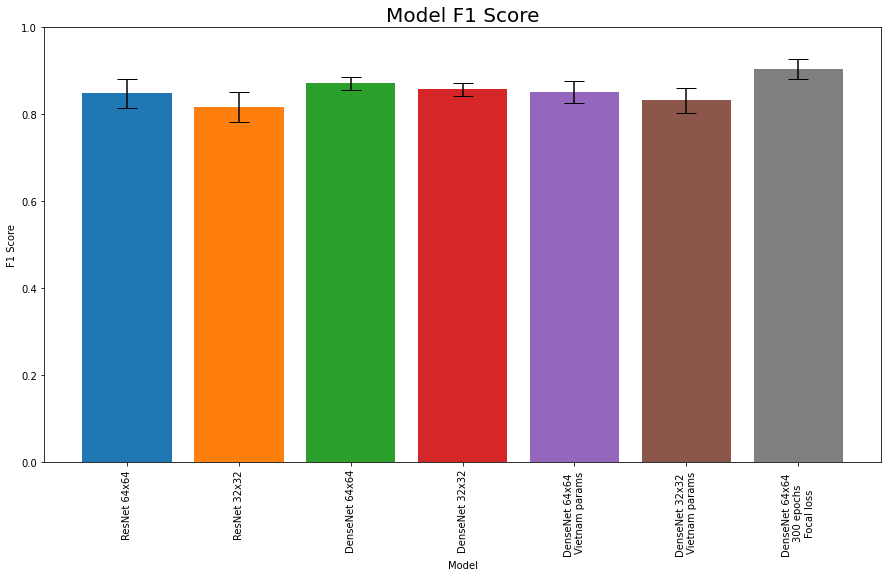

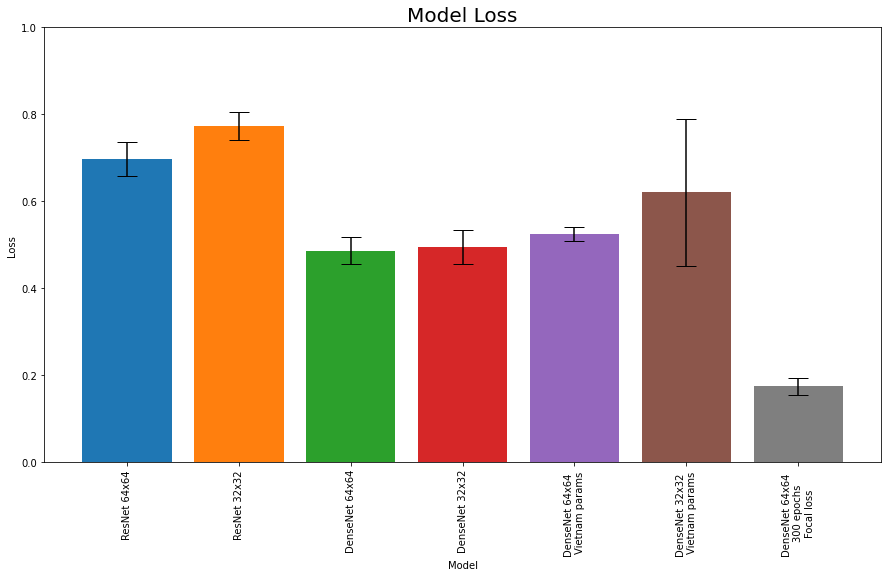

In [37]:
for name, values in dict_metrics.items():
    df_metric = pd.DataFrame(values).T
    df_metric.columns = list(paths.keys())
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    means = df_metric.mean(axis=0).to_numpy()
    stds = df_metric.std(axis=0).to_numpy()

    ax.bar(list(paths.keys()), means, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:gray'], yerr=stds, align='center', capsize=10)
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_xlabel("Model")
    ax.set_ylabel(name)
    ax.set_title(f"Model {name}", fontsize=20)
    ax.set_ylim([0,1])

# Culture - Stratified dataset

In [40]:
paths = {
    'ResNet 64x64':os.path.join(SAVED_MODELS_PATH, TENSORFLOW_HUB_PATH, 'Culture','strat_culture_1', 'strat_culture_1.json'),
    'ResNet 32x32':os.path.join(SAVED_MODELS_PATH, TENSORFLOW_HUB_PATH, 'Culture','strat_culture_32_1', 'strat_culture_32_1.json'),
    'DenseNet 64x64':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Culture','strat_culture_1', 'strat_culture_1.json'),
    'DenseNet 32x32':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Culture','strat_culture_32_c1', 'strat_culture_32_c1.json')
}

In [41]:
epochs_accs = []
epochs_f1 = []
epochs_loss = []

for name, path in paths.items():
    with open(path) as json_file:
        data = json.load(json_file)
        
        epochs_accs.append(list(zip(*data))[1])
        epochs_f1.append(list(zip(*data))[4])
        epochs_loss.append(list(zip(*data))[0])


## Boxplot

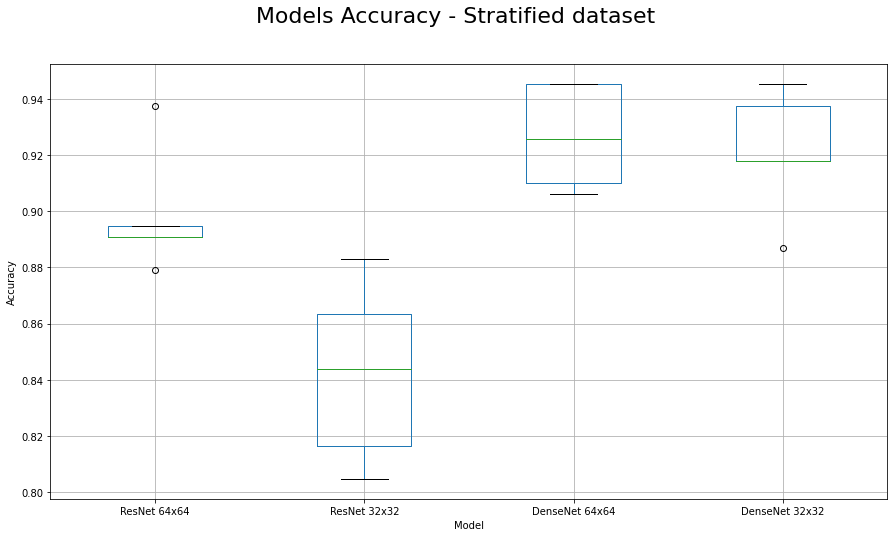

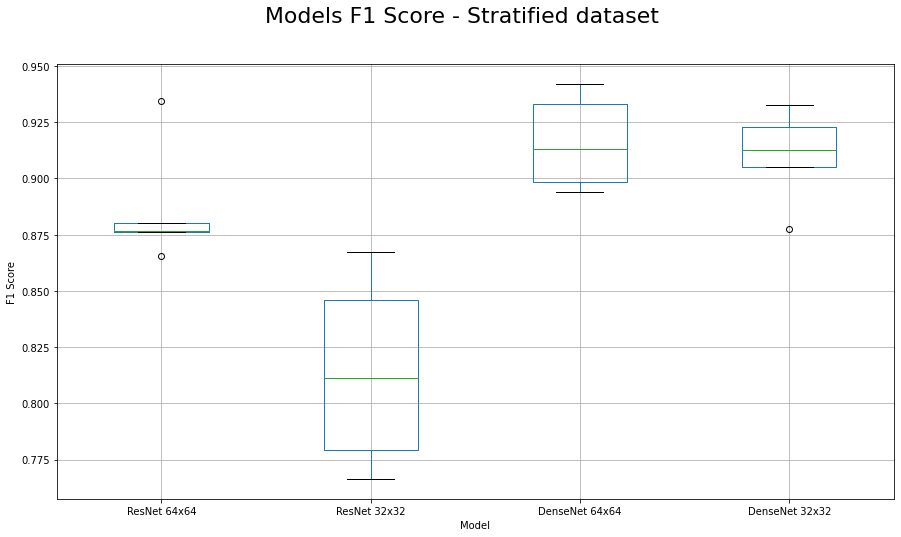

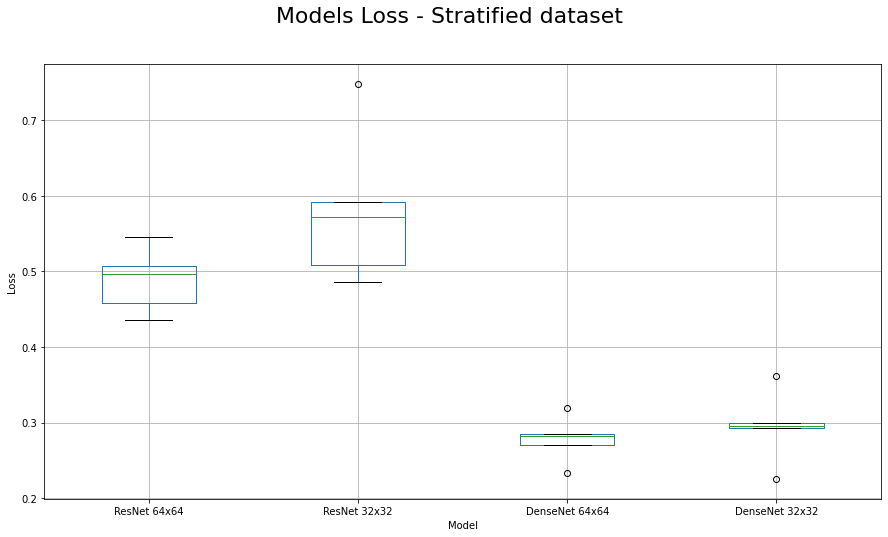

In [44]:
dict_metrics = {'Accuracy':epochs_accs, 'F1 Score':epochs_f1, 'Loss':epochs_loss}

for metric, values in dict_metrics.items():
    df_metric = pd.DataFrame(values).T
    df_metric.columns = list(paths.keys())

    fig, ax = plt.subplots(figsize=(15,8))
    fig.suptitle(f"Models {metric} - Stratified dataset", fontsize=22)
    
    ax.set_xlabel("Model")
    ax.set_ylabel(metric)

    
    df_metric.boxplot(ax=ax)

## Histogramme

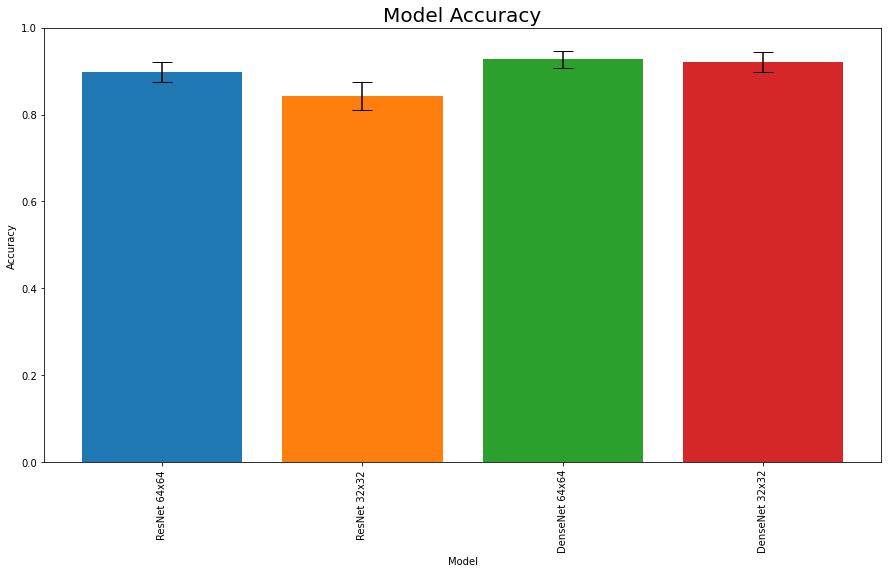

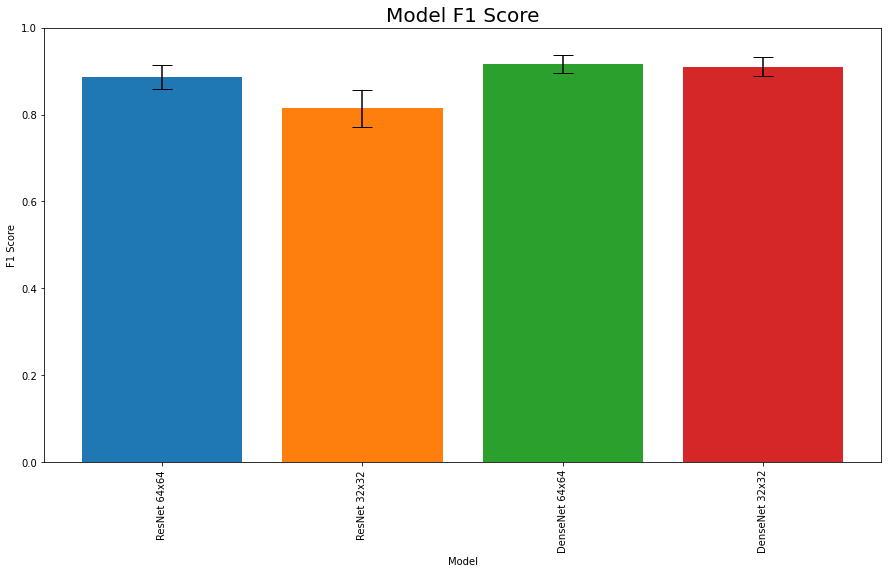

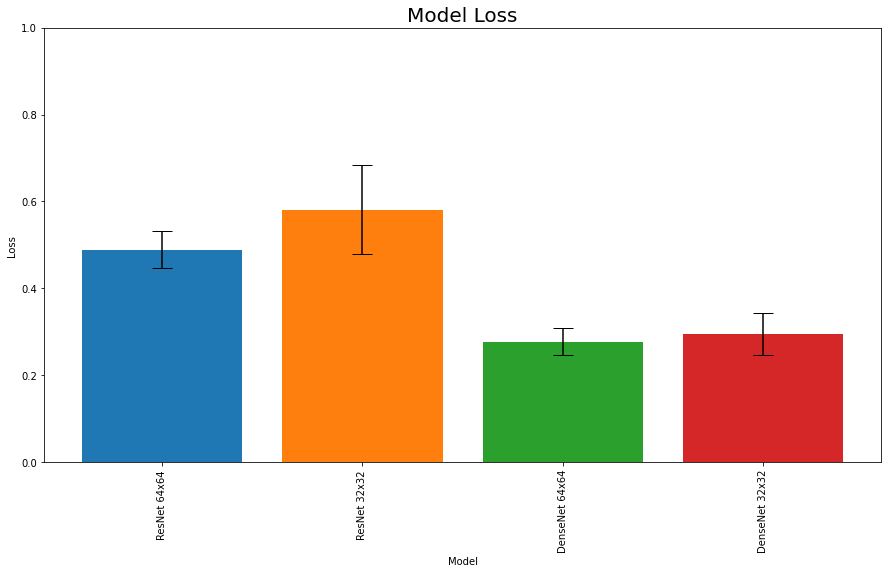

In [12]:
for name, values in dict_metrics.items():
    df_metric = pd.DataFrame(values).T
    df_metric.columns = list(paths.keys())
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    means = df_metric.mean(axis=0).to_numpy()
    stds = df_metric.std(axis=0).to_numpy()

    ax.bar(list(paths.keys()), means, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'], yerr=stds, align='center', capsize=10)
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_xlabel("Model")
    ax.set_ylabel(name)
    ax.set_title(f"Model {name}", fontsize=20)
    ax.set_ylim([0,1])

# Coffee - Spatial Cross val

In [19]:
paths = {
    'DenseNet 64x64':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','spacv_coffee_3', 'spacv_coffee_3.json'),
    'DenseNet 32x32':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','spacv_coffee_32_1', 'spacv_coffee_32_1.json'),
    'DenseNet 64x64 \nVietnam params':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','spacv_coffee_vietnam', 'spacv_coffee_vietnam.json'),
    'DenseNet 32x32 \nVietnam params':os.path.join(SAVED_MODELS_PATH, TRANSFER_LEARNING_PATH, 'Coffee','spacv_coffee_32_vietnam', 'spacv_coffee_32_vietnam.json'),
}

## Boxplot

In [25]:
epochs_accs = []
epochs_f1 = []
epochs_loss = []

for name, path in paths.items():
    with open(path) as json_file:
        data = json.load(json_file)
        
        metrics = list(zip(*data))
        
        epochs_loss.append(metrics[0])
        epochs_accs.append(metrics[1])

        if len(metrics) > 4:
            epochs_f1.append(metrics[4])
        else:
            tmp = []
            for i in range(0,len(metrics[2])):
                tmp.append(2*((metrics[2][i]*metrics[3][i]) / (metrics[2][i]+metrics[3][i])))
            epochs_f1.append(tmp)
        


### Boxplot

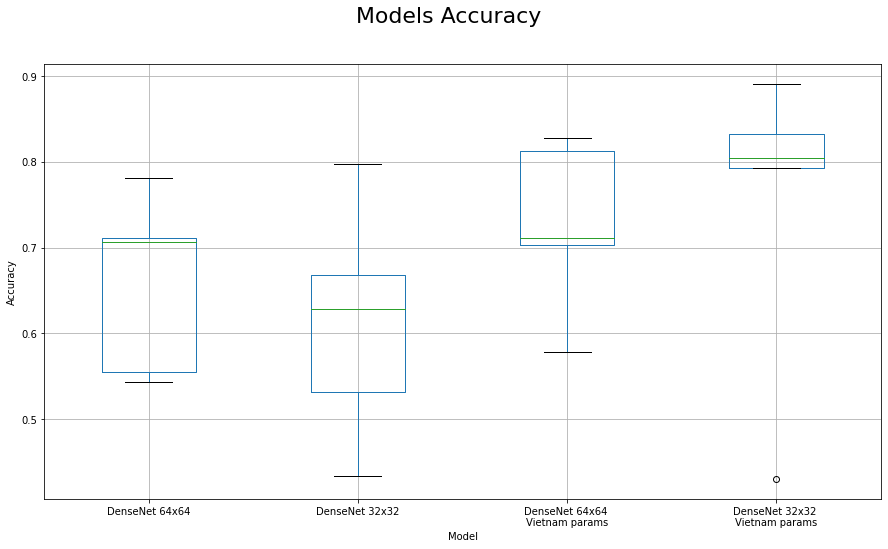

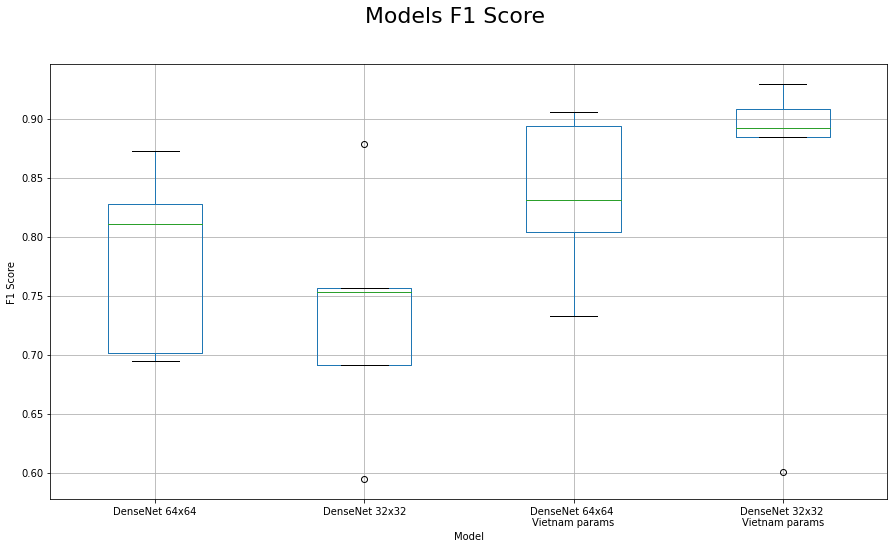

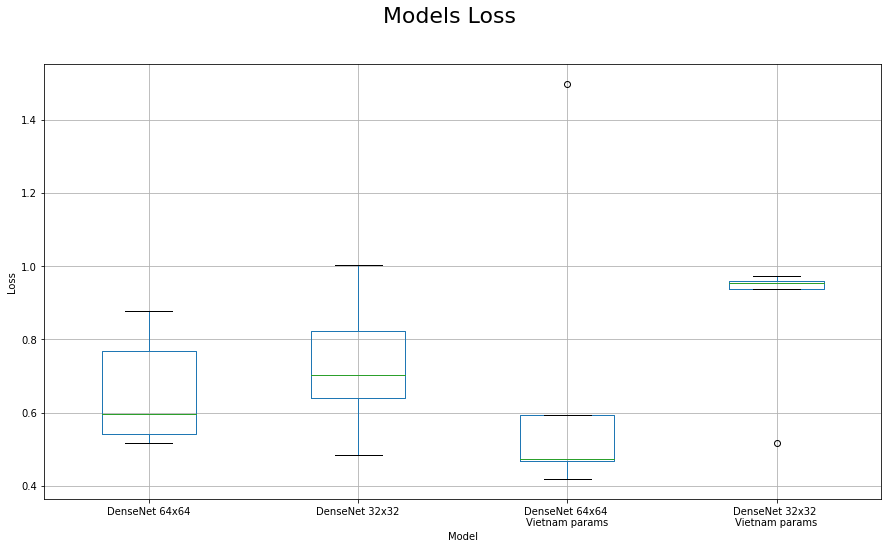

In [26]:
dict_metrics = {'Accuracy':epochs_accs, 'F1 Score':epochs_f1, 'Loss':epochs_loss}

for metric, values in dict_metrics.items():
    df_metric = pd.DataFrame(values).T
    df_metric.columns = list(paths.keys())

    fig, ax = plt.subplots(figsize=(15,8))
    fig.suptitle(f"Models {metric}", fontsize=22)
    
    ax.set_xlabel("Model")
    ax.set_ylabel(metric)

    
    df_metric.boxplot(ax=ax)

## Histogramme

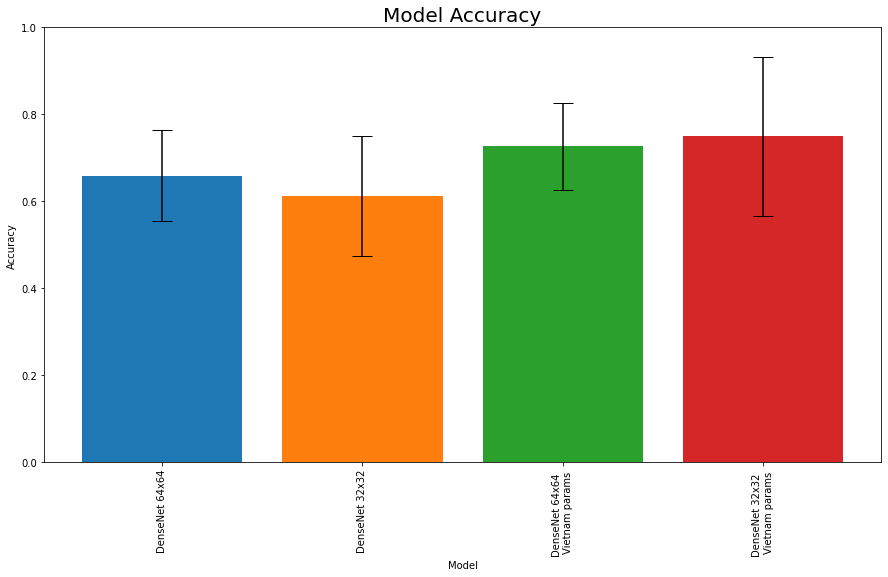

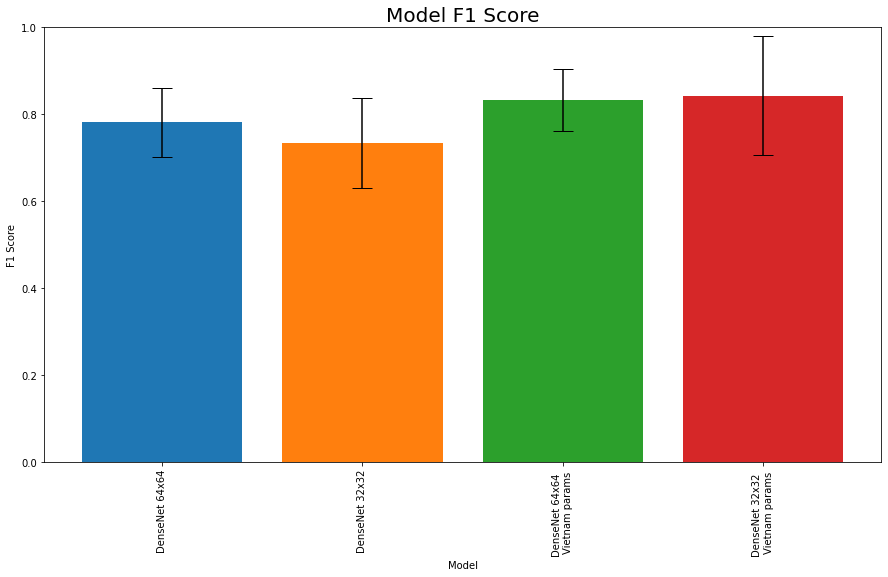

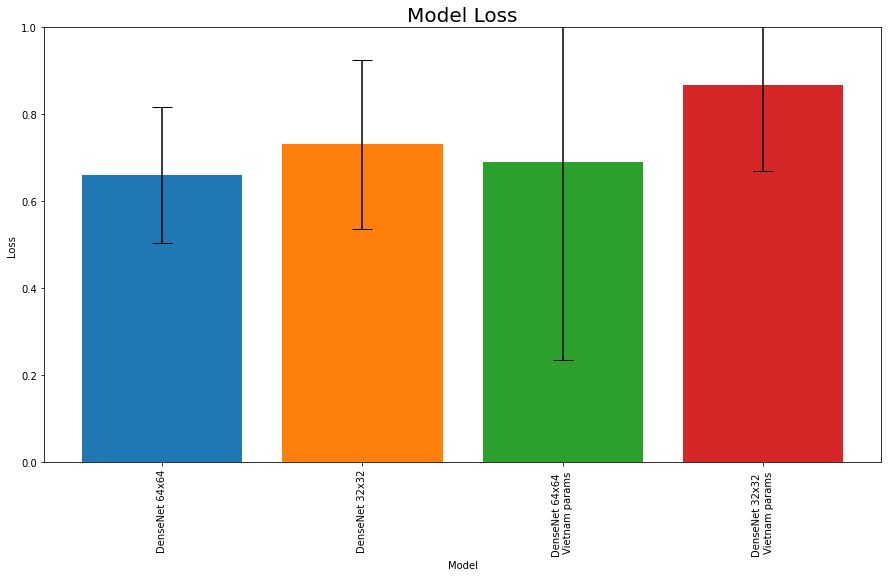

In [27]:
for name, values in dict_metrics.items():
    df_metric = pd.DataFrame(values).T
    df_metric.columns = list(paths.keys())
    
    fig, ax = plt.subplots(figsize=(15,8))
    
    means = df_metric.mean(axis=0).to_numpy()
    stds = df_metric.std(axis=0).to_numpy()

    ax.bar(list(paths.keys()), means, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'], yerr=stds, align='center', capsize=10)
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_xlabel("Model")
    ax.set_ylabel(name)
    ax.set_title(f"Model {name}", fontsize=20)
    ax.set_ylim([0,1])

# Transfer learning DenseNet model

## Performance 64x64 vs 32x32 - All year dataset
### Coffee

In [42]:
history32 = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee','32x32transfer', '32x32transfer.npy'),allow_pickle='TRUE').item()
history64 = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee','cross_val_coffee_1', 'cross_val_coffee_1_2.npy'),allow_pickle='TRUE').item()

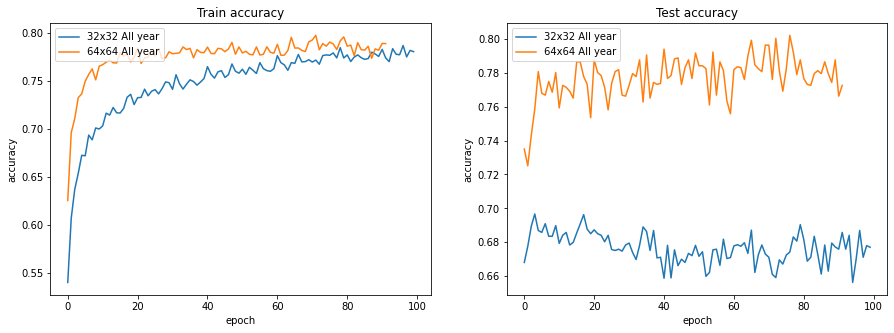

In [43]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['accuracy'])
axes[0].plot(history64['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32 All year', '64x64 All year'], loc='upper left')

axes[1].plot(history32['val_accuracy'])
axes[1].plot(history64['val_accuracy'])
axes[1].set_title('Test accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32 All year', '64x64 All year'], loc='upper left')

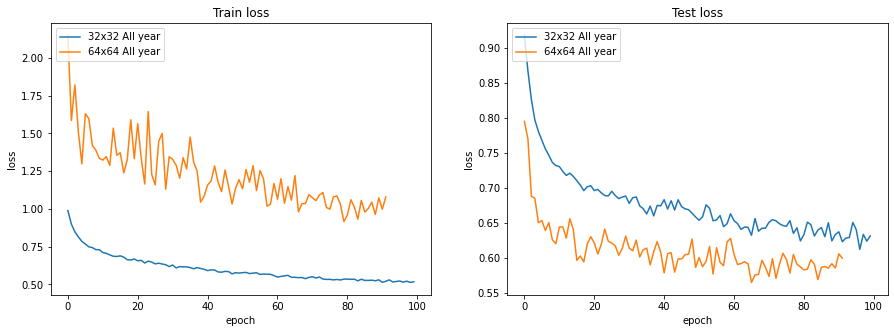

In [44]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['loss'])
axes[0].plot(history64['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32 All year', '64x64 All year'], loc='upper left')

axes[1].plot(history32['val_loss'])
axes[1].plot(history64['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32 All year', '64x64 All year'], loc='upper left')

### Culture vs no culture

In [6]:
history32 = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Culture','32x32transfer_culture', '32x32transfer_culture.npy'),allow_pickle='TRUE').item()
history64 = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Culture','transfer_learning_culture2', 'transfer_learning_culture2.npy'),allow_pickle='TRUE').item()

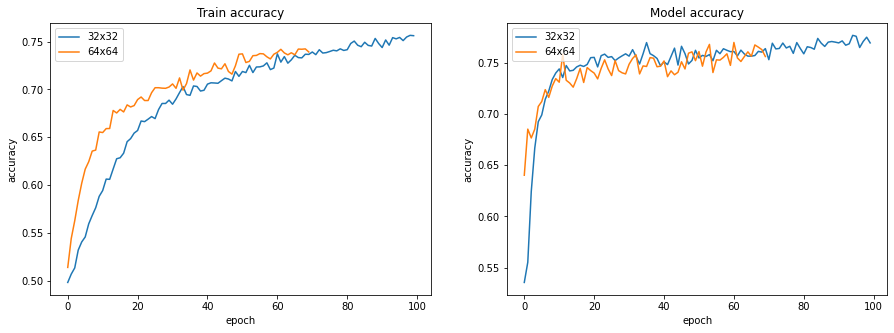

In [7]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['accuracy'])
axes[0].plot(history64['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32 All year', '64x64 All year'], loc='upper left')

axes[1].plot(history32['val_accuracy'])
axes[1].plot(history64['val_accuracy'])
axes[1].set_title('Model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32 All year', '64x64 All year'], loc='upper left')

Text(0.5, 0, 'epoch')

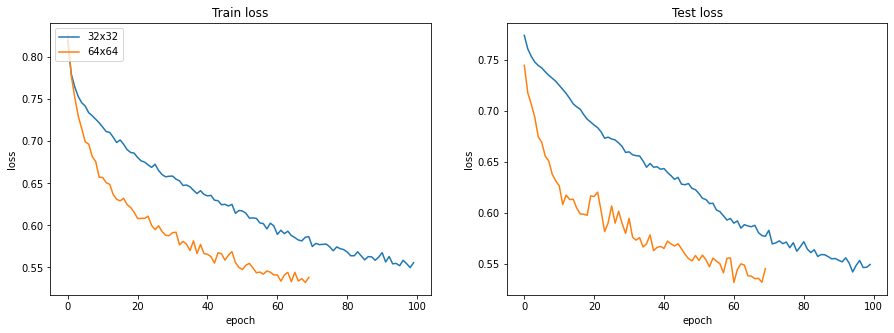

In [8]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['loss'])
axes[0].plot(history64['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32 All year', '64x64 All year'], loc='upper left')

axes[1].plot(history32['val_loss'])
axes[1].plot(history64['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32 All year', '64x64 All year'], loc='upper left')

## Spring x5 vs all year dataset

In [9]:
history_fall = np.load(os.path.join(SAVED_MODELS_PATH,'transfer_learning', 'Coffee','trans_learning_fall', 'trans_learning_fall.npy'),allow_pickle='TRUE').item()
history_base = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee','transfer_learning3', 'transfer_learning3.npy'),allow_pickle='TRUE').item()

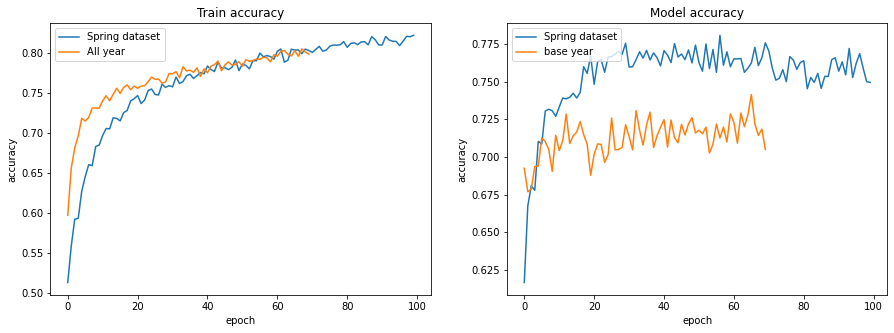

In [10]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_fall['accuracy'])
axes[0].plot(history_base['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['Spring x5 dataset', 'All year'], loc='upper left')

axes[1].plot(history_fall['val_accuracy'])
axes[1].plot(history_base['val_accuracy'])
axes[1].set_title('Model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['Spring x5 dataset', 'All year'], loc='upper left')

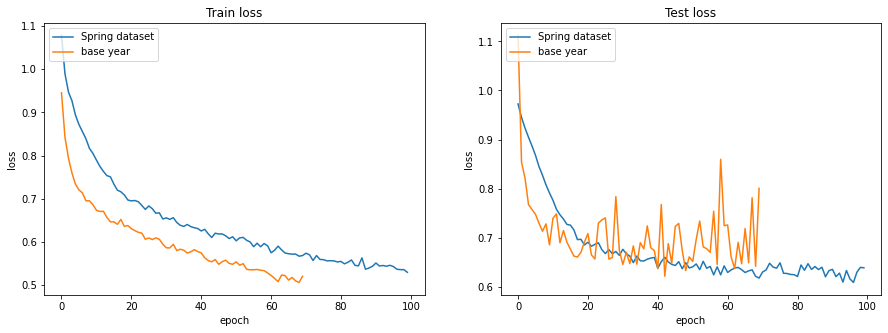

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_fall['loss'])
axes[0].plot(history_base['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['Spring dataset', 'base year'], loc='upper left')

axes[1].plot(history_fall['val_loss'])
axes[1].plot(history_base['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['Spring dataset', 'base year'], loc='upper left')

## Vietnam vs Eurosat params - all year dataset

In [12]:
history_viet = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee','trans_learning_viet_params', 'trans_learning_viet_params.npy'),allow_pickle='TRUE').item()
history_base = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee','transfer_learning3', 'transfer_learning3.npy'),allow_pickle='TRUE').item()

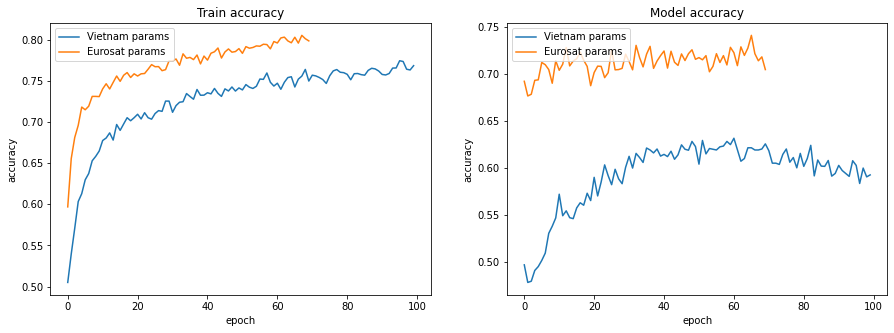

In [13]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_viet['accuracy'])
axes[0].plot(history_base['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['Vietnam params', 'Eurosat params'], loc='upper left')

axes[1].plot(history_viet['val_accuracy'])
axes[1].plot(history_base['val_accuracy'])
axes[1].set_title('Model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['Vietnam params', 'Eurosat params'], loc='upper left')

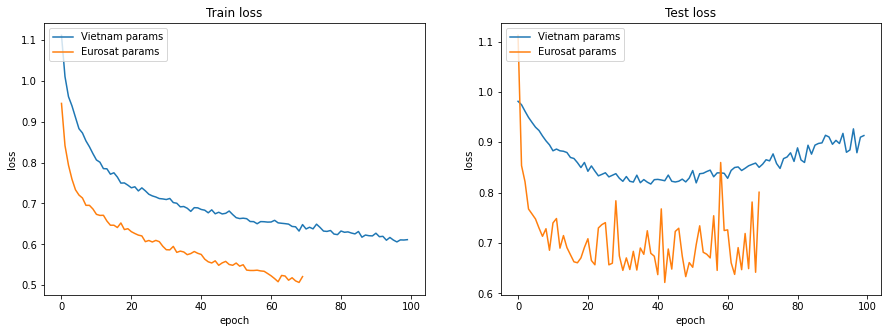

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_viet['loss'])
axes[0].plot(history_base['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['Vietnam params', 'Eurosat params'], loc='upper left')

axes[1].plot(history_viet['val_loss'])
axes[1].plot(history_base['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['Vietnam params', 'Eurosat params'], loc='upper left')

## Model evaluation with cross val 
### Coffee vs other - All year dataset

In [15]:
data_test = pd.read_csv(os.path.join('datasets', 'all_year_test.csv'))

path_test = data_test['path_test'].to_numpy()
y_test = data_test['y_test'].to_numpy()

In [16]:
results = None
with open(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee', 'final_cv_coffee_vietnam_1', 'final_cv_coffee_vietnam_1.json')) as json_file:
    results = json.load(json_file)

In [17]:
losses, accs = zip(*results)

print(f"Mean accuracy : {np.mean(accs)}")
print(f"Stdev accuracy : {np.std(accs)}")
print("\n")
print(f"Mean loss : {np.mean(losses)}")
print(f"Stdev loss : {np.std(losses)}")

Mean accuracy : 0.75703125
Stdev accuracy : 0.033457207977131025


Mean loss : 0.720274555683136
Stdev loss : 0.12481706405182705


In [18]:
restored_model = get_best_cross_val_model(os.path.join(SAVED_MODELS_PATH,'transfer_learning', 'Coffee', 'final_cv_coffee_vietnam_1'), 'final_cv_coffee_vietnam_1', results, custom_objects={'LeakyReLU':LeakyReLU})
test_generator = generator(path_test, 
                            y_test, 
                            eurosat_params['mean'], 
                            eurosat_params['std'], 
                            batch_size=BATCH_SIZE)
restored_model.evaluate(test_generator,steps=30)
Y_true = []
Y_pred = []
for i in range (0,30):
    X, Y = next(test_generator)
    Y_pred.extend(np.where(restored_model.predict(X) > 0.5, 1, 0))

    Y_true.extend(Y.tolist())
    
Y_true = np.asarray(Y_true)
Y_pred = np.asarray(Y_pred)
cm = confusion_matrix(Y_true, Y_pred)
plot_confusion_matrix(cm, ["Coffee", "Other"])
print(classification_report(Y_true, Y_pred))
print(f"F1-Score : {f1_score(Y_true, Y_pred)}")

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

## Coffee vs other - Spring x5 dataset

In [ ]:
data_test = pd.read_csv(os.path.join('datasets', 'spring_test.csv'))

path_test = data_test['path_test'].to_numpy()
y_test = data_test['y_test'].to_numpy()

BATCH_SIZE=64

In [19]:
results = None
with open(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee', 'final_cv_coffee_fall_1', 'final_cv_coffee_fall_1.json')) as json_file:
    results = json.load(json_file)

In [20]:
losses, accs = zip(*results)

print(f"Mean accuracy : {np.mean(accs)}")
print(f"Stdev accuracy : {np.std(accs)}")
print("\n")
print(f"Mean loss : {np.mean(losses)}")
print(f"Stdev loss : {np.std(losses)}")

Mean accuracy : 0.91328125
Stdev accuracy : 0.019515618744994995


Mean loss : 0.3725772678852081
Stdev loss : 0.07785066759607095


In [ ]:
restored_model = get_best_cross_val_model(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee', 'final_cv_coffee_fall_1'), 'final_cv_coffee_fall_1', results, custom_objects={'LeakyReLU':LeakyReLU})
test_generator = generator(path_test, 
                            y_test, 
                            eurosat_params['mean'], 
                            eurosat_params['std'], 
                            batch_size=BATCH_SIZE)
restored_model.evaluate(test_generator,steps=30)
Y_true = []
Y_pred = []
for i in range (0,30):
    X, Y = next(test_generator)
    Y_pred.extend(np.where(restored_model.predict(X) > 0.5, 1, 0))

    Y_true.extend(Y.tolist())
    
Y_true = np.asarray(Y_true)
Y_pred = np.asarray(Y_pred)
cm = confusion_matrix(Y_true, Y_pred)
plot_confusion_matrix(cm, ["Coffee", "Other"])
print(classification_report(Y_true, Y_pred))
print(f"F1-Score : {f1_score(Y_true, Y_pred)}")

## Culture vs no-culture - Spring x5 dataset

In [21]:
results = None
with open(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Culture', 'cross_val_culture', 'cross_val_culture.json')) as json_file:
    results = json.load(json_file)

In [22]:
losses, accs = zip(*results)

print(f"Mean accuracy : {np.mean(accs)}")
print(f"Stdev accuracy : {np.std(accs)}")
print("\n")
print(f"Mean loss : {np.mean(losses)}")
print(f"Stdev loss : {np.std(losses)}")

Mean accuracy : 0.9125
Stdev accuracy : 0.012499999999999999


Mean loss : 0.2805428922176361
Stdev loss : 0.0254475370728173


In [ ]:
restored_model = get_best_cross_val_model(os.path.join(SAVED_MODELS_PATH,'transfer_learning', 'Culture', 'cross_val_culture'), 'cross_val_culture', results, custom_objects={'LeakyReLU':LeakyReLU})
test_generator = generator(path_test, 
                            y_test, 
                            eurosat_params['mean'], 
                            eurosat_params['std'], 
                            batch_size=BATCH_SIZE)
restored_model.evaluate(test_generator,steps=30)
Y_true = []
Y_pred = []
for i in range (0,30):
    X, Y = next(test_generator)
    Y_pred.extend(np.where(restored_model.predict(X) > 0.5, 1, 0))

    Y_true.extend(Y.tolist())
    
Y_true = np.asarray(Y_true)
Y_pred = np.asarray(Y_pred)
cm = confusion_matrix(Y_true, Y_pred)
plot_confusion_matrix(cm, ["Culture", "No culture"])
print(classification_report(Y_true, Y_pred))
print(f"F1-Score : {f1_score(Y_true, Y_pred)}")

# Tensorflow hub - ResNet50
## Performance 64x64 vs 32x32
### Coffee vs other

In [30]:
history32 = np.load(os.path.join(SAVED_MODELS_PATH,'tensowflow_hub', 'Culture','32x32','32x32.npy'),allow_pickle='TRUE').item()
history64 = np.load(os.path.join(SAVED_MODELS_PATH, 'tensowflow_hub', 'Culture','augmented1','augmented1.npy'),allow_pickle='TRUE').item()

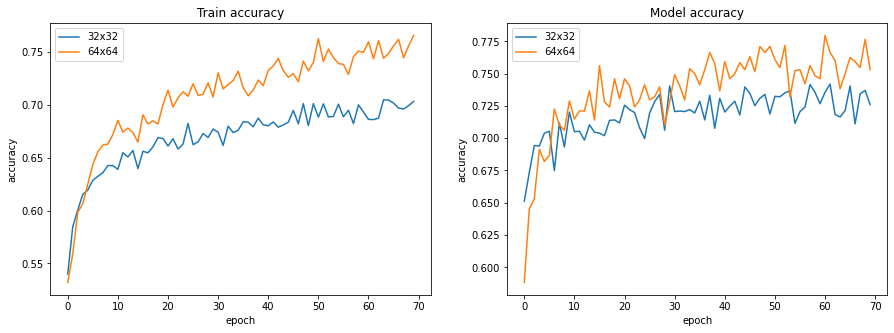

In [31]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['accuracy'])
axes[0].plot(history64['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32', '64x64'], loc='upper left')

axes[1].plot(history32['val_accuracy'])
axes[1].plot(history64['val_accuracy'])
axes[1].set_title('Model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32', '64x64'], loc='upper left')

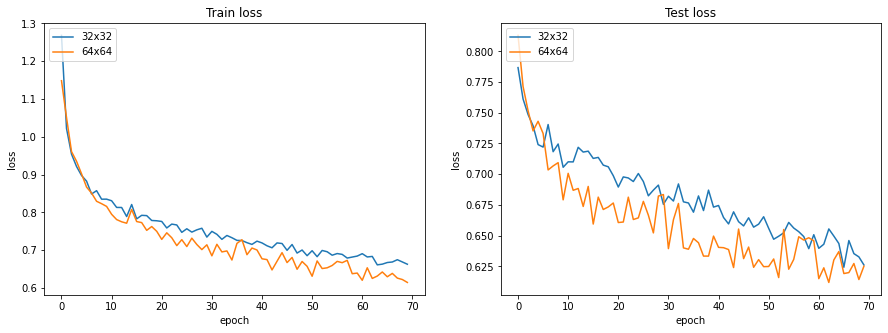

In [32]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['loss'])
axes[0].plot(history64['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32', '64x64'], loc='upper left')

axes[1].plot(history32['val_loss'])
axes[1].plot(history64['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32', '64x64'], loc='upper left')

### Culture vs no culture

In [24]:
history32 = np.load(os.path.join(SAVED_MODELS_PATH, 'tensowflow_hub', 'Culture','32x32culture','32x32culture.npy'),allow_pickle='TRUE').item()
history64 = np.load(os.path.join(SAVED_MODELS_PATH, 'tensowflow_hub', 'Culture','culture3','culture3.npy'),allow_pickle='TRUE').item()

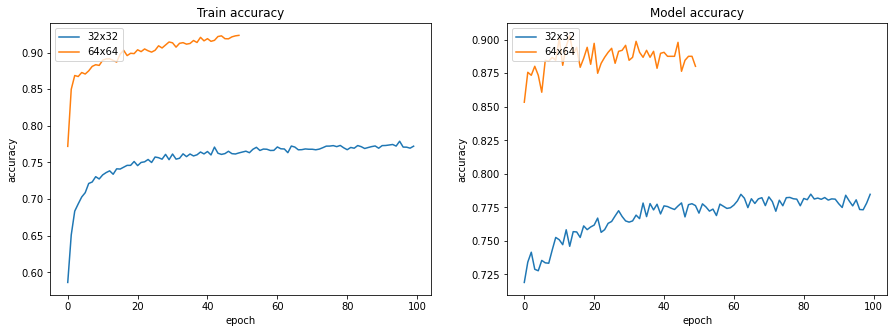

In [25]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['accuracy'])
axes[0].plot(history64['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32', '64x64'], loc='upper left')

axes[1].plot(history32['val_accuracy'])
axes[1].plot(history64['val_accuracy'])
axes[1].set_title('Model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32', '64x64'], loc='upper left')

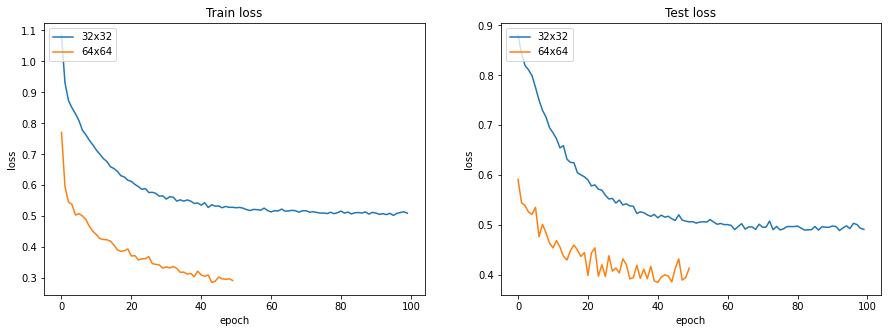

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history32['loss'])
axes[0].plot(history64['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['32x32', '64x64'], loc='upper left')

axes[1].plot(history32['val_loss'])
axes[1].plot(history64['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['32x32', '64x64'], loc='upper left')

# DenseNet201 vs ResNet50

In [45]:
history_hub = np.load(os.path.join(SAVED_MODELS_PATH, 'tensowflow_hub', 'Culture','augmented1','augmented1.npy'),allow_pickle='TRUE').item()
history_dense = np.load(os.path.join(SAVED_MODELS_PATH, 'transfer_learning','Coffee','cross_val_coffee_1', 'cross_val_coffee_1_2.npy'),allow_pickle='TRUE').item()

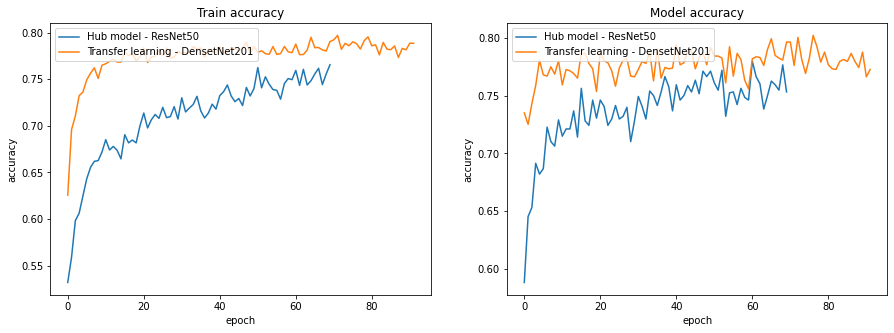

In [47]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_hub['accuracy'])
axes[0].plot(history_dense['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['Hub model - ResNet50', 'Transfer learning - DensetNet201'], loc='upper left')

axes[1].plot(history_hub['val_accuracy'])
axes[1].plot(history_dense['val_accuracy'])
axes[1].set_title('Model accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['Hub model - ResNet50', 'Transfer learning - DensetNet201'], loc='upper left')

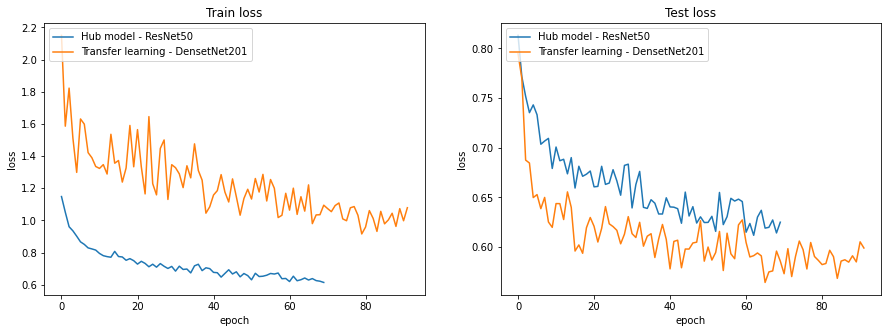

In [48]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_hub['loss'])
axes[0].plot(history_dense['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['Hub model - ResNet50', 'Transfer learning - DensetNet201'], loc='upper left')

axes[1].plot(history_hub['val_loss'])
axes[1].plot(history_dense['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['Hub model - ResNet50', 'Transfer learning - DensetNet201'], loc='upper left')

# Band variation model - DenseNet201
## 3 bands 

In [50]:
history_13bands = np.load(os.path.join(SAVED_MODELS_PATH, 'band_variation','Coffee','band_variation3_13bands_1', 'band_variation3_13bands_1.npy'),allow_pickle='TRUE').item()
history_rgb_swir_bands = np.load(os.path.join(SAVED_MODELS_PATH, 'band_variation','Coffee','band_variation3_RGB_SWIR_1', 'band_variation3_RGB_SWIR_1.npy'),allow_pickle='TRUE').item()
history_highres_bands = np.load(os.path.join(SAVED_MODELS_PATH, 'band_variation','Coffee','band_variation3_highres_1', 'band_variation3_highres_1.npy'),allow_pickle='TRUE').item()
history_transfer_learning = np.load(os.path.join('saved_models','transfer_learning', 'Coffee','transfer_learning3', 'transfer_learning3.npy'),allow_pickle='TRUE').item()

13 bands test accuracy : 0.4865364134311676
High res test accuracy : 0.47848957777023315
RGB + SWIR test accuracy : 0.6016015410423279
Original model test accuracy : 0.71833336353302


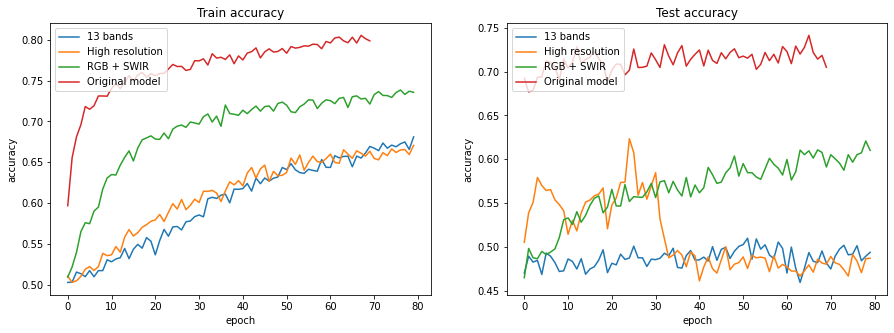

In [52]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_13bands['accuracy'])
axes[0].plot(history_highres_bands['accuracy'])
axes[0].plot(history_rgb_swir_bands['accuracy'])
axes[0].plot(history_transfer_learning['accuracy'])
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['13 bands', 'High resolution', 'RGB + SWIR','Original model'], loc='upper left')

axes[1].plot(history_13bands['val_accuracy'])
axes[1].plot(history_highres_bands['val_accuracy'])
axes[1].plot(history_rgb_swir_bands['val_accuracy'])
axes[1].plot(history_transfer_learning['val_accuracy'])
axes[1].set_title('Test accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['13 bands', 'High resolution', 'RGB + SWIR', 'Original model'], loc='upper left')

print(f"13 bands test accuracy : {np.mean(history_13bands['val_accuracy'][-20:])}")
print(f"High res test accuracy : {np.mean(history_highres_bands['val_accuracy'][-20:])}")
print(f"RGB + SWIR test accuracy : {np.mean(history_rgb_swir_bands['val_accuracy'][-20:])}")
print(f"Original model test accuracy : {np.mean(history_transfer_learning['val_accuracy'][-20:])}")

13 bands test loss : 1.0146326931317649
High res test loss : 0.8543806447585425
RGB + SWIR test loss : 0.7041762778162955
Original model test loss : 0.702540054048101


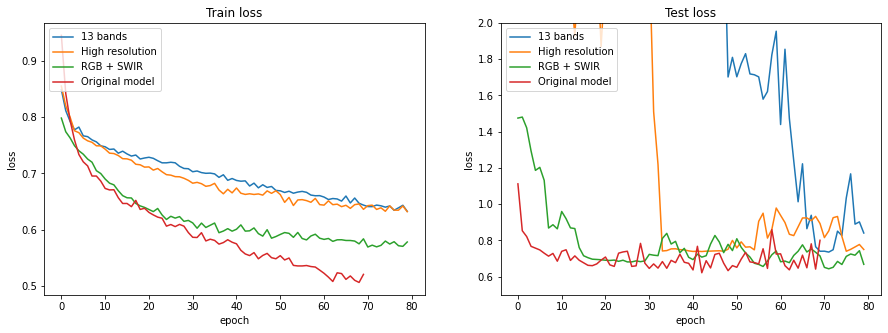

In [53]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_13bands['loss'])
axes[0].plot(history_highres_bands['loss'])
axes[0].plot(history_rgb_swir_bands['loss'])
axes[0].plot(history_transfer_learning['loss'])
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['13 bands', 'High resolution', 'RGB + SWIR', 'Original model'], loc='upper left')

axes[1].plot(history_13bands['val_loss'])
axes[1].plot(history_highres_bands['val_loss'])
axes[1].plot(history_rgb_swir_bands['val_loss'])
axes[1].plot(history_transfer_learning['val_loss'])
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].set_ylim([0.5,2])
axes[1].legend(['13 bands', 'High resolution', 'RGB + SWIR', 'Original model'], loc='upper left')

print(f"13 bands test loss : {np.mean(history_13bands['val_loss'][-20:])}")
print(f"High res test loss : {np.mean(history_highres_bands['val_loss'][-20:])}")
print(f"RGB + SWIR test loss : {np.mean(history_rgb_swir_bands['val_loss'][-20:])}")
print(f"Original model test loss : {np.mean(history_transfer_learning['val_loss'][-20:])}")

## 13 bands model

In [54]:
history_highres_bands = np.load(os.path.join(SAVED_MODELS_PATH,'band_variation', 'Coffee','band_variation13_highres', 'band_variation13_highres.npy'),allow_pickle='TRUE').item()
history_rgb_swir_bands = np.load(os.path.join(SAVED_MODELS_PATH,'band_variation',  'Coffee','band_variation13_RGB_SWR', 'band_variation13_RGB_SWR.npy'),allow_pickle='TRUE').item()
history_transfer_learning = np.load(os.path.join('saved_models','transfer_learning', 'Coffee','transfer_learning3', 'transfer_learning3.npy'),allow_pickle='TRUE').item()

High res test accuracy : 0.5473177433013916
RGB + SWIR test accuracy : 0.6244140863418579
Original model test accuracy : 0.71833336353302


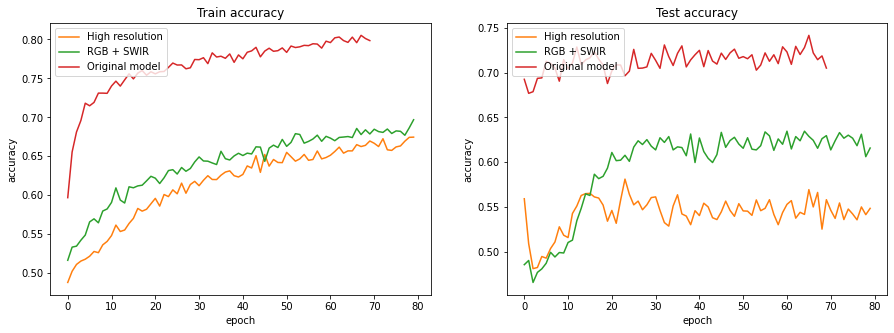

In [56]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_highres_bands['accuracy'], color='tab:orange')
axes[0].plot(history_rgb_swir_bands['accuracy'], color='tab:green')
axes[0].plot(history_transfer_learning['accuracy'], color='tab:red')
axes[0].set_title('Train accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['High resolution','RGB + SWIR', 'Original model'], loc='upper left')

axes[1].plot(history_highres_bands['val_accuracy'], color='tab:orange')
axes[1].plot(history_rgb_swir_bands['val_accuracy'], color='tab:green')
axes[1].plot(history_transfer_learning['val_accuracy'], color='tab:red')
axes[1].set_title('Test accuracy')
axes[1].set_ylabel('accuracy')
axes[1].set_xlabel('epoch')
axes[1].legend(['High resolution','RGB + SWIR', 'Original model'], loc='upper left')

print(f"High res test accuracy : {np.mean(history_highres_bands['val_accuracy'][-20:])}")
print(f"RGB + SWIR test accuracy : {np.mean(history_rgb_swir_bands['val_accuracy'][-20:])}")
print(f"Original model test accuracy : {np.mean(history_transfer_learning['val_accuracy'][-20:])}")

High res test loss : 0.7385803946355978
RGB + SWIR test loss : 0.7478472946584225
Original model test loss : 0.702540054048101


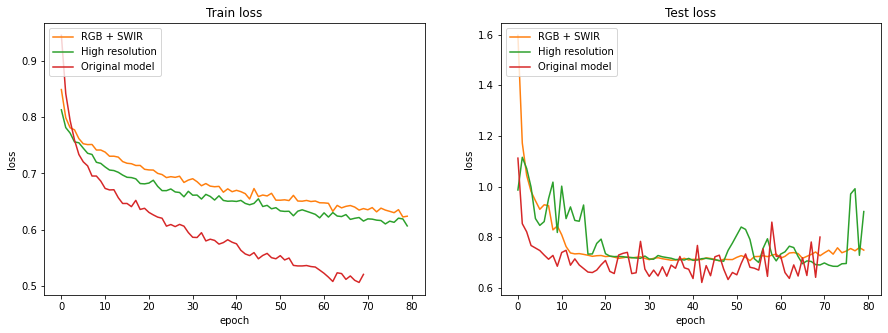

In [57]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# summarize history for accuracy
axes[0].plot(history_highres_bands['loss'], color='tab:orange')
axes[0].plot(history_rgb_swir_bands['loss'], color='tab:green')
axes[0].plot(history_transfer_learning['loss'], color='tab:red')
axes[0].set_title('Train loss')
axes[0].set_ylabel('loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['RGB + SWIR', 'High resolution', 'Original model'], loc='upper left')

axes[1].plot(history_highres_bands['val_loss'], color='tab:orange')
axes[1].plot(history_rgb_swir_bands['val_loss'], color='tab:green')
axes[1].plot(history_transfer_learning['val_loss'], color='tab:red')
axes[1].set_title('Test loss')
axes[1].set_ylabel('loss')
axes[1].set_xlabel('epoch')
axes[1].legend(['RGB + SWIR', 'High resolution', 'Original model'], loc='upper left')

print(f"High res test loss : {np.mean(history_highres_bands['val_loss'][-20:])}")
print(f"RGB + SWIR test loss : {np.mean(history_rgb_swir_bands['val_loss'][-20:])}")
print(f"Original model test loss : {np.mean(history_transfer_learning['val_loss'][-20:])}")

## new

In [4]:
restored_model = load_model(os.path.join("saved_models/transfer_learning/Coffee/strat_coffee_32_1/strat_coffee_32_1_1.h5"), custom_objects={'LeakyReLU':LeakyReLU})

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
test_generator = generator(data_test['path'].to_numpy(), 
                            data_test['label'].to_numpy(), 
                            eurosat_params['mean'], 
                            eurosat_params['std'], 
                            batch_size=781)
restored_model.evaluate(test_generator,steps=1)
Y_true = []
Y_pred = []
for i in range (0,1):
    X, Y = next(test_generator)
    Y_pred.extend(np.where(restored_model.predict(X) > 0.5, 1, 0))

    Y_true.extend(Y.tolist())
    
Y_true = np.asarray(Y_true)
Y_pred = np.asarray(Y_pred)
cm = confusion_matrix(Y_true, Y_pred)
plot_confusion_matrix(cm, ["Coffee", "Other"])
print(classification_report(Y_true, Y_pred))
print(f"F1-Score : {f1_score(Y_true, Y_pred)}")